In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs
from pyproj import CRS
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim

# 1. Importing the retail location data

In [4]:
retail_data = pd.read_csv("data/retail_locations.csv")

# drop duplicate rows if they exists

retail_data = retail_data.drop_duplicates()

# Obtain import the downloaded quebec building data into a geopandas dataframe

#building_map = gpd.read_file('data/ODB_Quebec/odb_quebec.shp')


# Exploring the datasets

## a. Building Dataset

In [5]:
#building_map

In [6]:
# Check the data types of the bulding dataset
#building_map.dtypes

In [7]:
#building_map.iloc[23]

## b. Retail location dataset

In [8]:
retail_data

,erp_id,province_code,lat,long,sales
0,4,QC,45.537593,-73.597075,0.089069
1,19,QC,45.488636,-73.568175,0.074907
2,22,QC,48.387871,-68.470686,0.611644
3,24,QC,46.795660,-71.356166,-0.778827
4,37,QC,45.510311,-73.570841,0.586588
...,...,...,...,...,...
1147,6821,QC,46.760381,-71.363740,4.703588
1148,6826,QC,46.817782,-71.253214,1.011329
1149,6830,QC,45.757450,-73.479966,-1.599532
1150,6849,QC,46.816699,-71.202551,0.173749


In [9]:
retail_data.dtypes

erp_id             int64
province_code     object
lat              float64
long             float64
sales            float64
dtype: object

# 2. List of retail location and geofences

In [10]:
# Create a geopandas dataframe using the retail data
gdf_sales = gpd.GeoDataFrame(
    retail_data, geometry=gpd.points_from_xy(retail_data.long, retail_data.lat))
gdf_sales

,erp_id,province_code,lat,long,sales,geometry
0,4,QC,45.537593,-73.597075,0.089069,POINT (-73.59708 45.53759)
1,19,QC,45.488636,-73.568175,0.074907,POINT (-73.56817 45.48864)
2,22,QC,48.387871,-68.470686,0.611644,POINT (-68.47069 48.38787)
3,24,QC,46.795660,-71.356166,-0.778827,POINT (-71.35617 46.79566)
4,37,QC,45.510311,-73.570841,0.586588,POINT (-73.57084 45.51031)
...,...,...,...,...,...,...
1147,6821,QC,46.760381,-71.363740,4.703588,POINT (-71.36374 46.76038)
1148,6826,QC,46.817782,-71.253214,1.011329,POINT (-71.25321 46.81778)
1149,6830,QC,45.757450,-73.479966,-1.599532,POINT (-73.47997 45.75745)
1150,6849,QC,46.816699,-71.202551,0.173749,POINT (-71.20255 46.81670)


## a. Display on a map

Displaying the information on a white world map

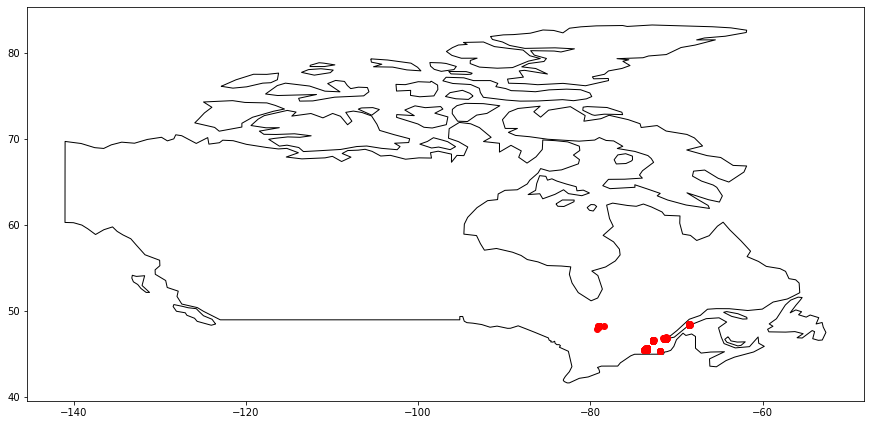

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15, 15))

# We restrict to South America.
world[world.name == 'Canada'].plot(ax = ax, color='white', edgecolor='black')


# We can now plot our ``GeoDataFrame``.
gdf_sales.plot(ax=ax, color='red')

plt.show()

## b. Displaying on an interactive map of quebec

This is done using the library folium in python

In [12]:
#Plot graph of sales in folium

sales_data_map = folium.map.FeatureGroup()
latitudes = list(gdf_sales.lat)
longitudes = list(gdf_sales.long)
sales = list(gdf_sales.sales)

In [13]:
#Build the map

DFW_Map = folium.Map(
                location = [45.537593, -73.597075], 
                zoom_start = 10)

In [14]:

# The size of the retail location varies with the number of sales
# Retail locations with red colors indicated sales with negative values

for lat, lng, sale in zip(latitudes, longitudes, sales):
  if sale <=0:
    folium.Circle(
        radius = 10*abs(sale),
      location = [lat, lng], 
      popup = sale,
      color='red', fill = False
     ).add_to(DFW_Map) 
  else:
    folium.Circle(
         radius = 10*abs(sale),
      location = [lat, lng], 
      popup = sale,
      color='green', fill = False
     ).add_to(DFW_Map)

In [15]:
DFW_Map.add_child(sales_data_map)
DFW_Map

In [ ]:
#Get the location (City of retail location)
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
retail_data['city'] = "null"

for index, row in retail_data.iterrows():
    location = geolocator.reverse(str(row['lat'])+","+str(row['long']))
    address = (location.raw['address'])
    city = address.get('city', '')
    retail_data['city'].iloc[index] = city
    


C:\Users\ngani\anaconda3\envs\mlenv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
retail_data

## c. Plotting the distribution

In [ ]:
import seaborn as sns, numpy as np
from scipy.stats import norm
#sns.set(rc={'figure.figsize':(20,20)})


# Plot

# Density Plot and Histogram of all arrival delays
sns.histplot(data=retail_data,x="sales", kde=True, hue = "city")

In [ ]:
'''m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data="data/Quebec.geojson",
    name="choropleth",
    data=data,
    columns=["sales"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Sales(%)"
).add_to(m)

folium.GeoJson(antarctic_ice_edge, name="geojson").add_to(m)
folium.LayerControl().add_to(m)

m'''